In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# Script

In [2]:
E_levels = [0, 1, 2, 3, 4, 5]
x_samples = 256
xlims = [np.array([-10, 10])*(E+1)**0.5 for E in E_levels]
ofdir = './time_evolution/'
t_samples = 10000
T = 2

In [51]:
for i, E in enumerate(tqdm(E_levels)):
    os.system(f"./exercise05 -m {x_samples} -x {xlims[i][0]},{xlims[i][1]} -n {t_samples} -t {T} -e {E} -o {ofdir}")

100%|██████████| 6/6 [00:03<00:00,  1.53it/s]


# Load data

In [3]:
E = 0
data_list = []
with open(ofdir + f"{E+1}.dat", 'rb') as file:
    for t in range(t_samples):
        data = np.fromfile(file, dtype='float64', count=x_samples)
        data_list.append(data)
data=np.stack(data_list)

In [53]:
data.shape

(10000, 256)

Text(0, 0.5, 'time [s]')

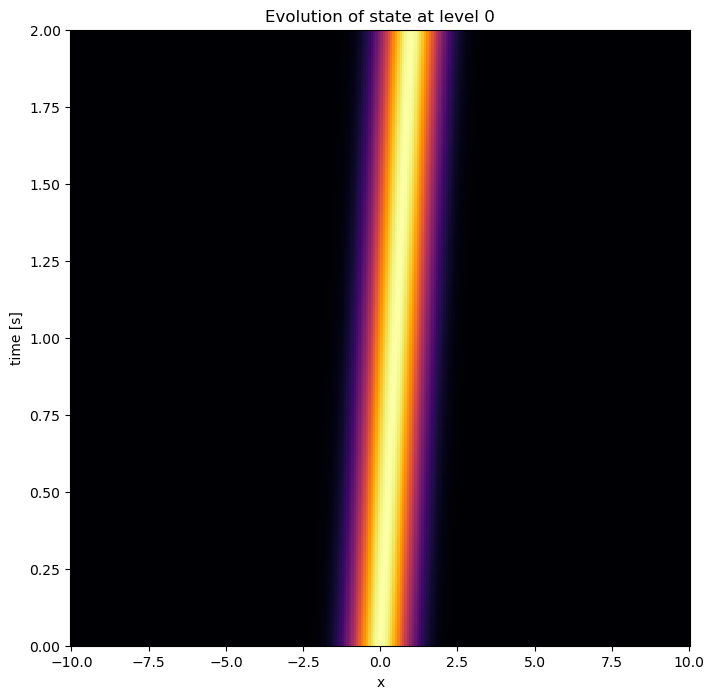

In [8]:
x = np.linspace(xlims[E][0], xlims[E][1], x_samples, endpoint=True)
y = np.linspace(0, T, t_samples, endpoint=True)
x_ticks = np.linspace(0, 256, 10, endpoint=True)
fig, ax = plt.subplots(figsize=(8,8))

ax.pcolormesh(x, y, data**2, cmap='inferno')
ax.set_title(f'Evolution of state at level {E}')
ax.set_xlabel('x')
ax.set_ylabel('time [s]')


In [19]:
sum(data[0,:])

6.708737443807621